LAB: Visualización de datos usando Matplotlib
==========================================

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('indicadores-mundiales.csv',sep=',',encoding='latin-1')

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](Images/suma-pob-region-edades-2.png)


In [11]:
df.columns

Index(['Ano', 'Dias para iniciar un negocio', 'Emisiones de CO2',
       'Esperanza de vida (mujeres)', 'Esperanza de vida (varones)',
       'Facilidad para hacer negocios', 'Gasto en salud ( del PIB)',
       'Gasto en salud (per capita)', 'Horas preparar los impuestos',
       'Interes de prestamos', 'PIB', 'Pais', 'Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+', 'Poblacion total',
       'Poblacion urbana', 'Region', 'Tasa de mortalidad infantil',
       'Tasa de natalidad', 'Tasa tributaria empresarial', 'Turismo emisor',
       'Turismo receptivo', 'Uso de Internet', 'Uso de energia',
       'Uso de telefonos celulares'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

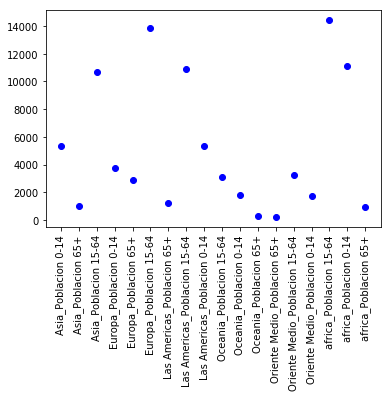

In [63]:
df1 = df.groupby(['Region'])['Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+'].sum().reset_index()
df1 = pd.melt(df1, 'Region').sort_values('Region')
df1['fullname'] = df1.Region + '_' + df1.variable
plt.plot(df1['fullname'],  df1.value, 'bo')
plt.xticks(rotation=90)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](Images/suma-pob-region-edades-3.png)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

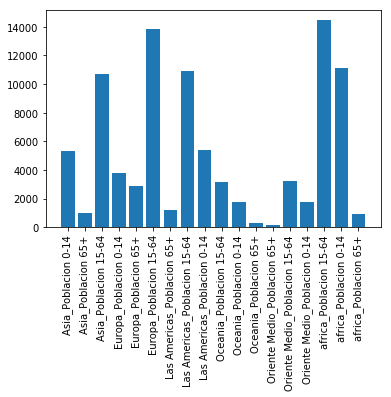

In [65]:
plt.bar(df1['fullname'],  df1.value)
plt.xticks(rotation=90)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](Images/suma-pob-region-edades-4.png)

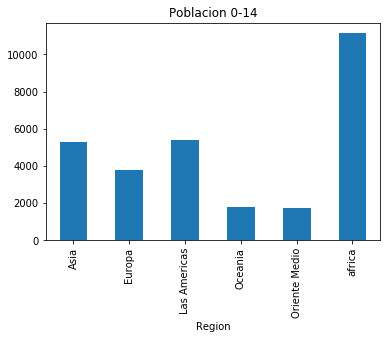

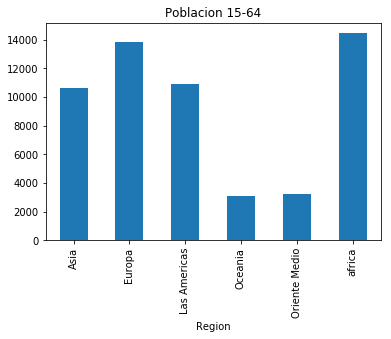

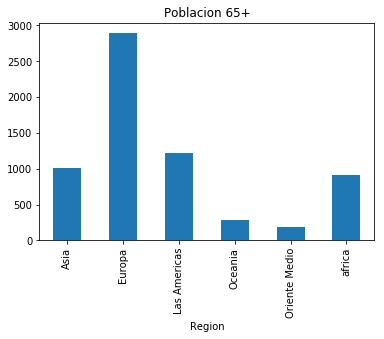

In [77]:
varss = ['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']
for i in varss:
    df2 = df[['Region', i]]
    df2 = df2.groupby('Region')[i].sum()
    df2.plot(kind = 'bar', title = i)
    plt.show()

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](Images/prom-gastos-salud-per-capita-ano.png)

In [78]:
df.columns

Index(['Ano', 'Dias para iniciar un negocio', 'Emisiones de CO2',
       'Esperanza de vida (mujeres)', 'Esperanza de vida (varones)',
       'Facilidad para hacer negocios', 'Gasto en salud ( del PIB)',
       'Gasto en salud (per capita)', 'Horas preparar los impuestos',
       'Interes de prestamos', 'PIB', 'Pais', 'Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+', 'Poblacion total',
       'Poblacion urbana', 'Region', 'Tasa de mortalidad infantil',
       'Tasa de natalidad', 'Tasa tributaria empresarial', 'Turismo emisor',
       'Turismo receptivo', 'Uso de Internet', 'Uso de energia',
       'Uso de telefonos celulares'],
      dtype='object')

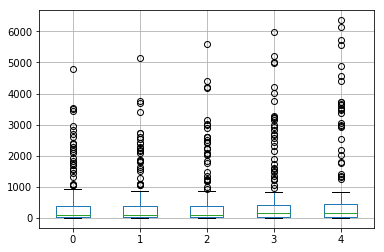

In [87]:
dfs = []
for i in df.Ano.unique():
    df3 = df.loc[df.Ano == i, 'Gasto en salud (per capita)'].reset_index(drop=True)
    dfs.append(df3)

df4 = pd.concat(dfs, axis=1, ignore_index=True)
df4.boxplot()    

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](Images/prom-region-edades-ano.png)

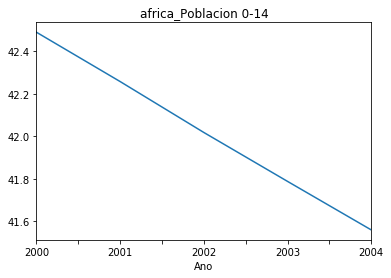

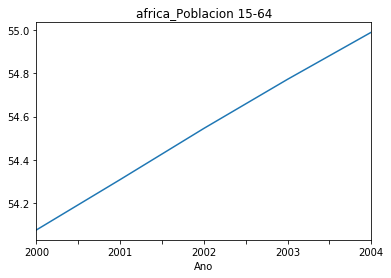

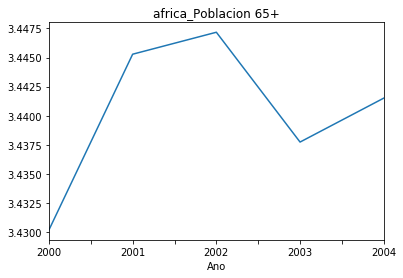

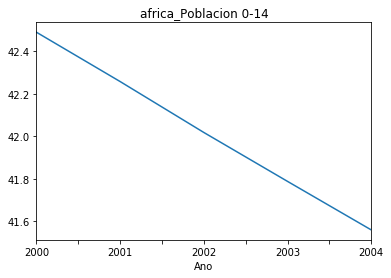

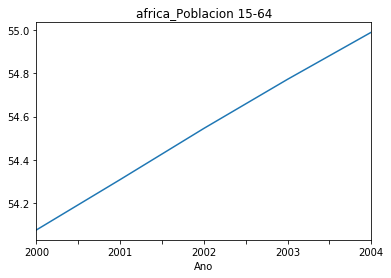

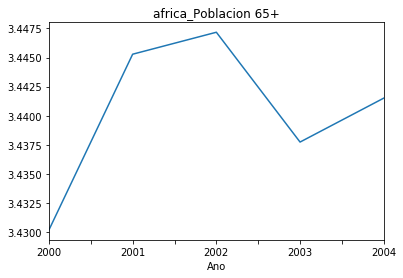

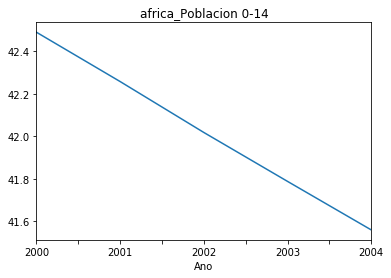

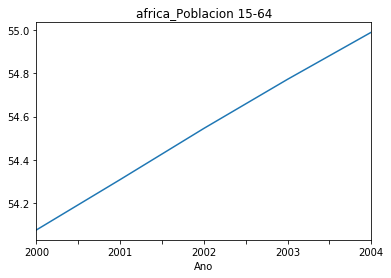

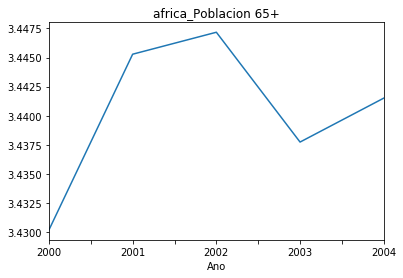

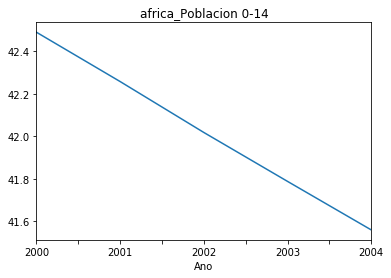

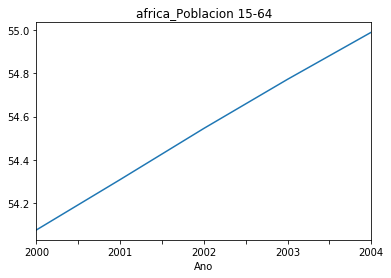

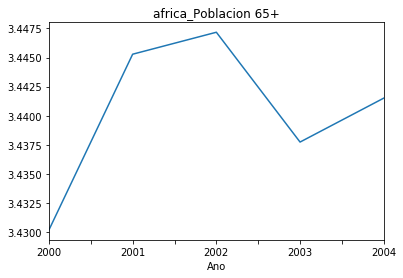

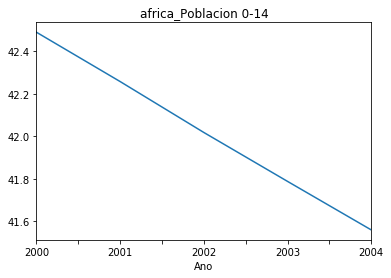

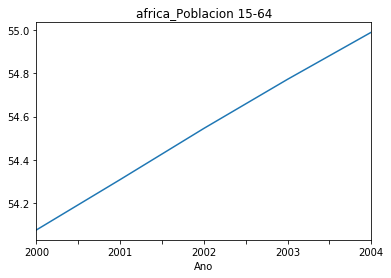

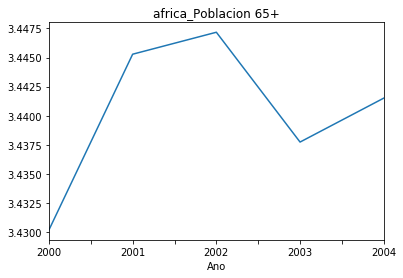

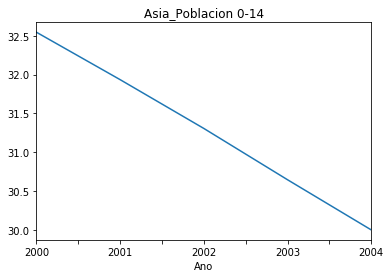

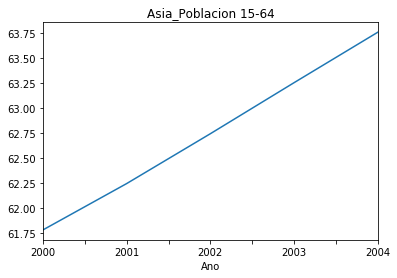

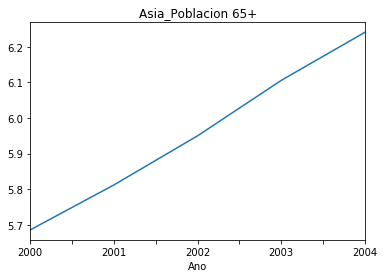

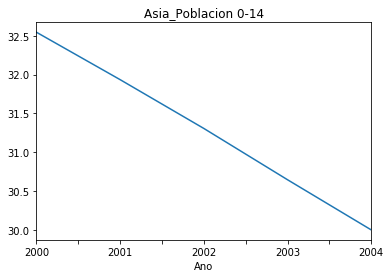

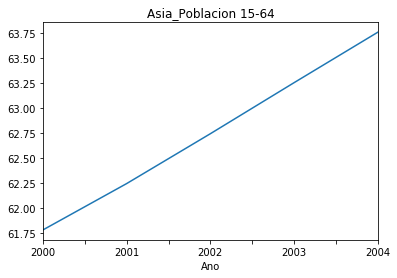

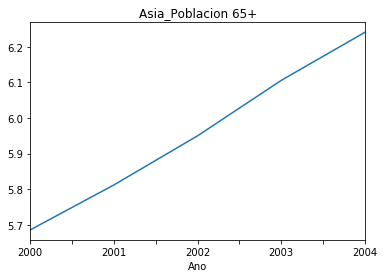

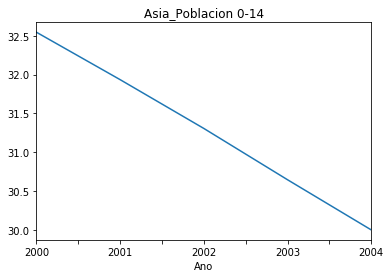

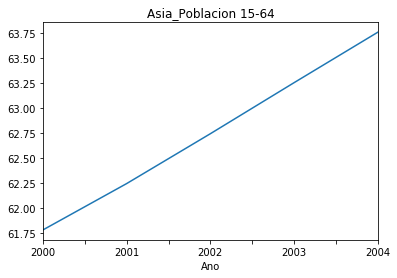

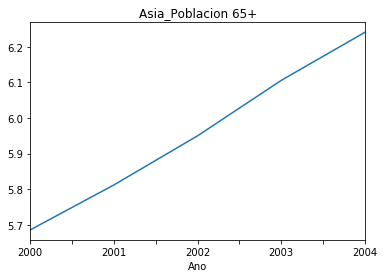

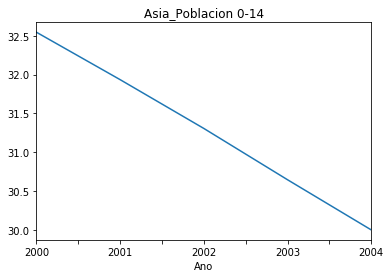

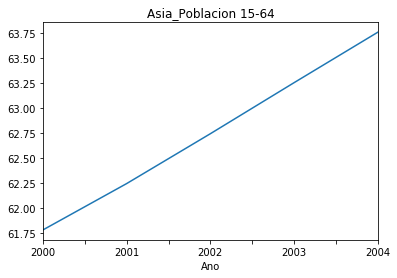

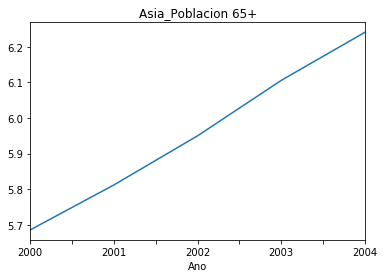

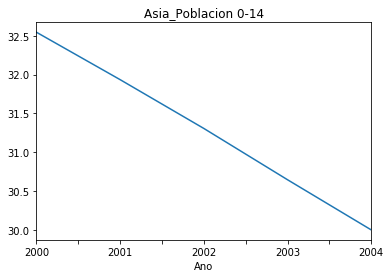

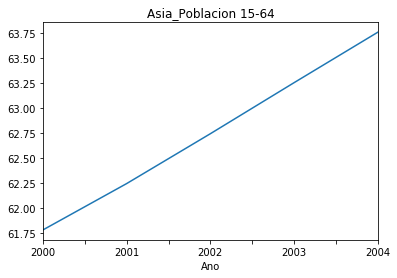

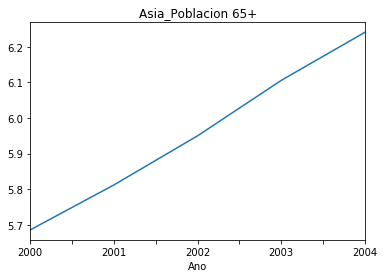

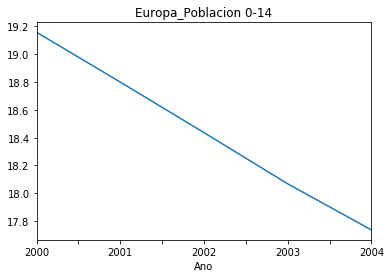

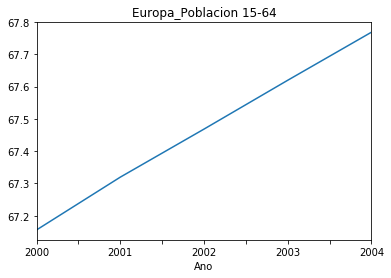

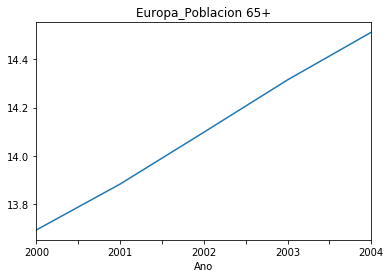

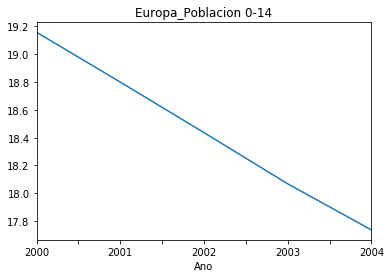

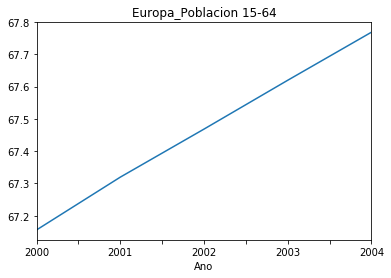

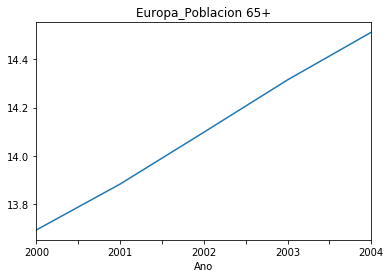

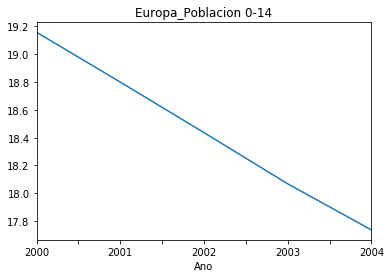

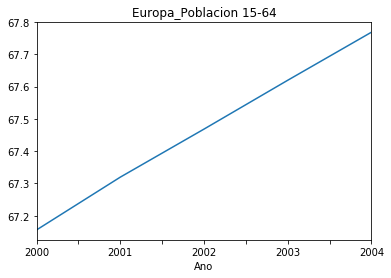

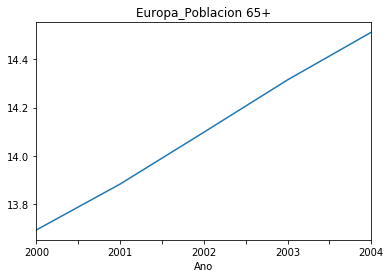

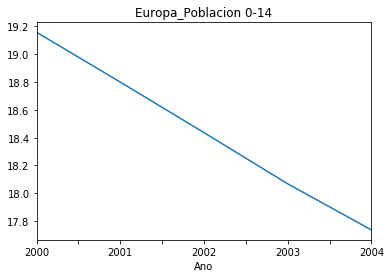

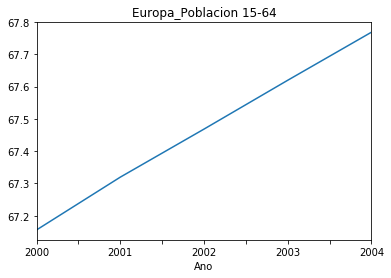

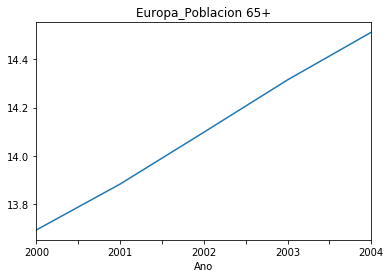

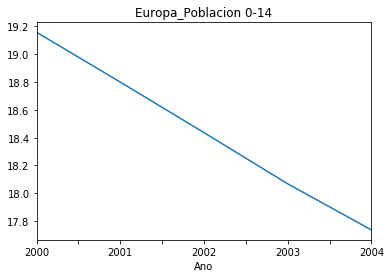

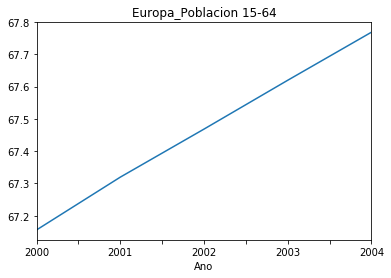

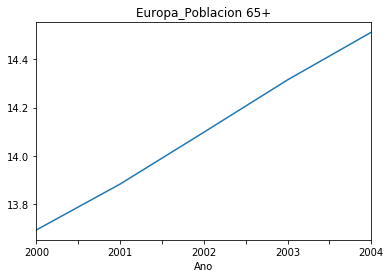

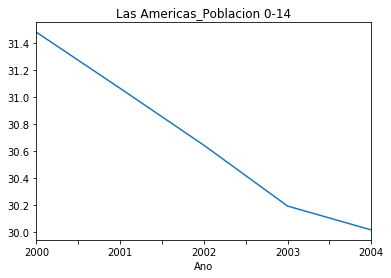

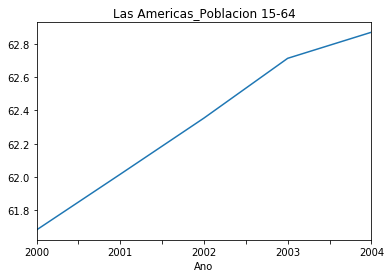

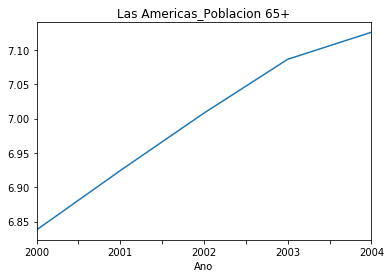

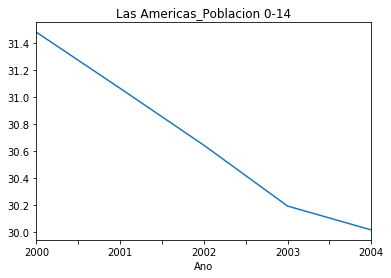

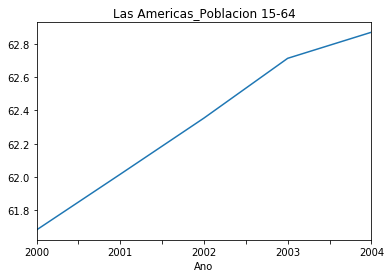

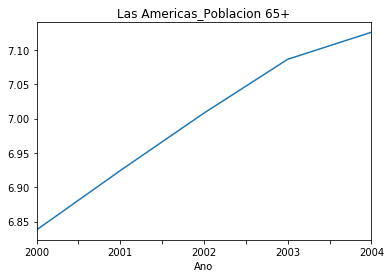

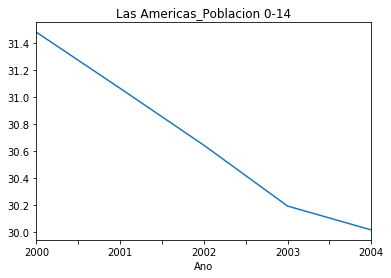

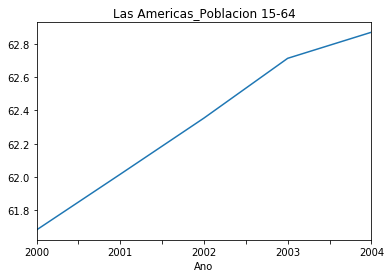

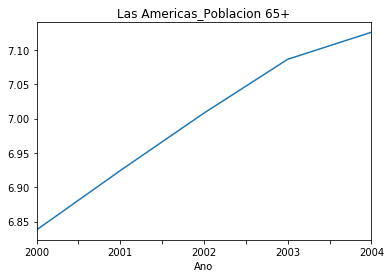

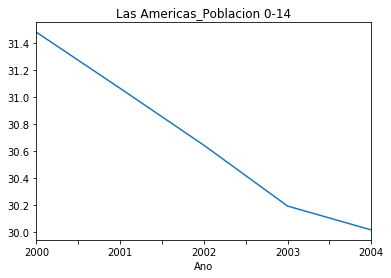

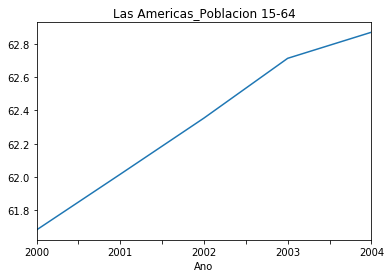

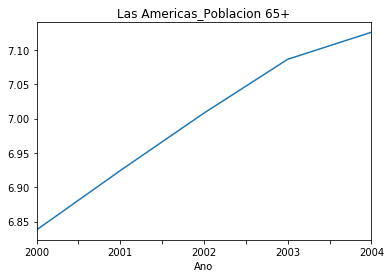

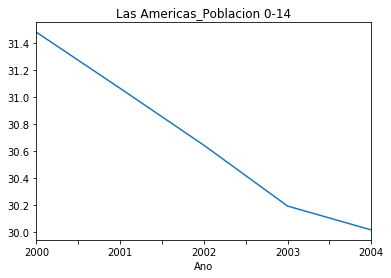

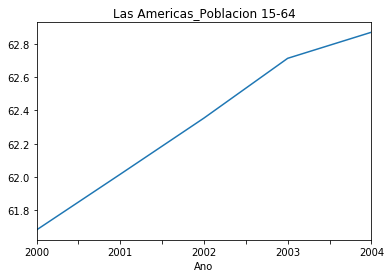

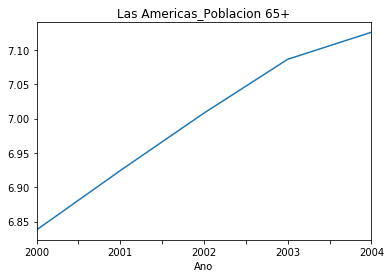

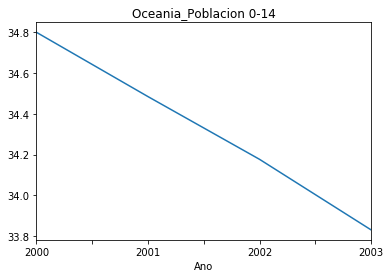

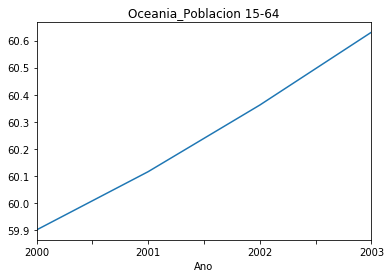

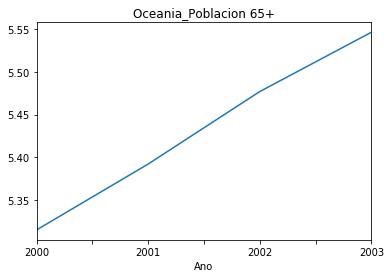

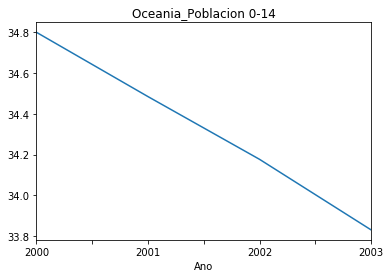

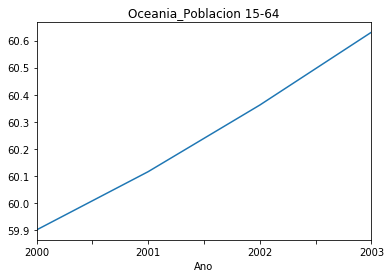

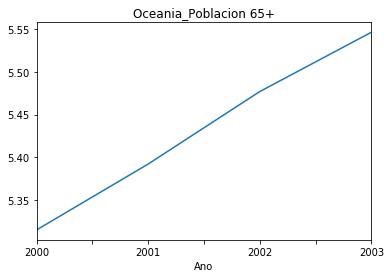

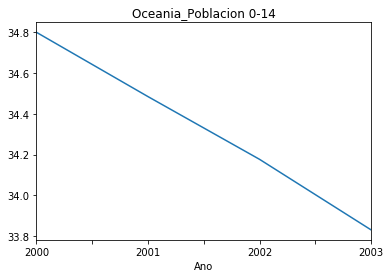

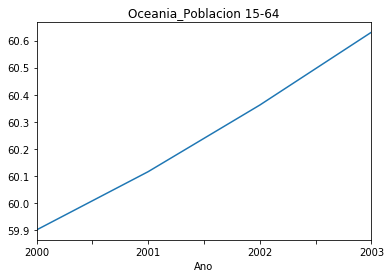

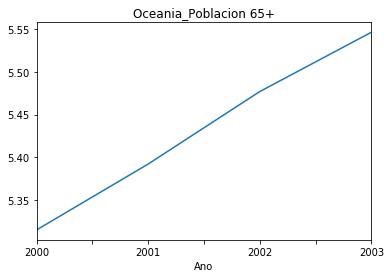

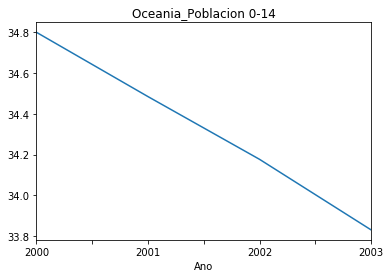

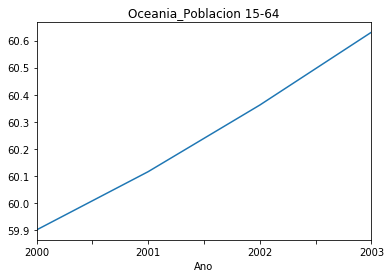

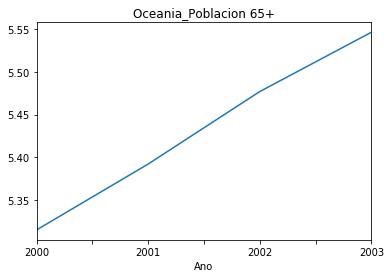

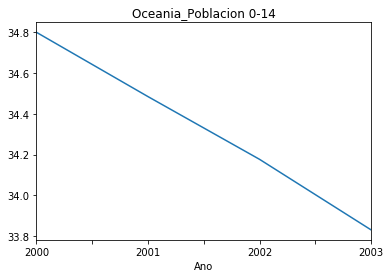

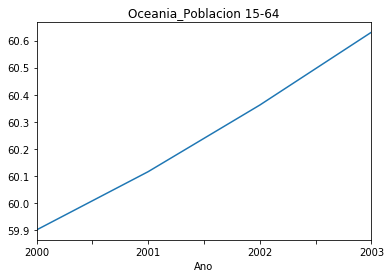

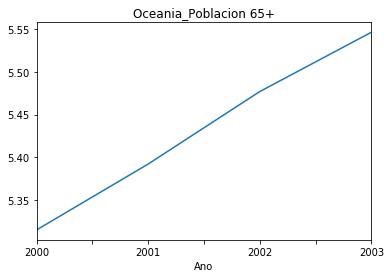

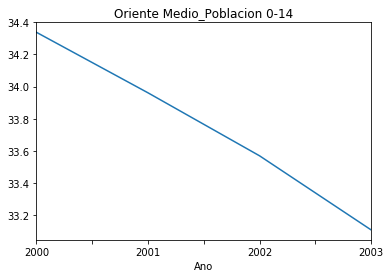

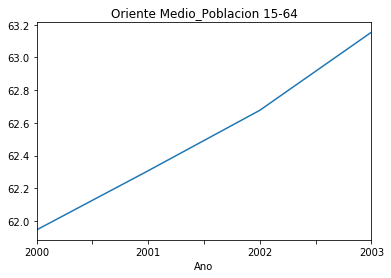

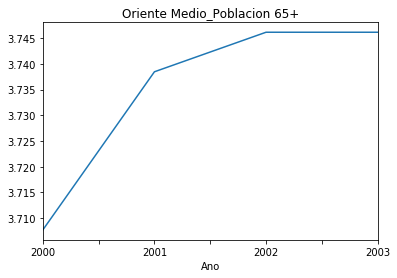

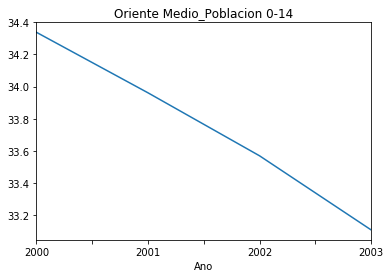

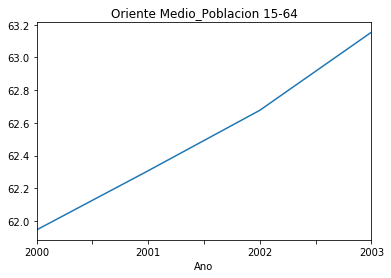

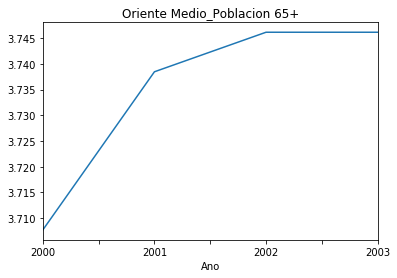

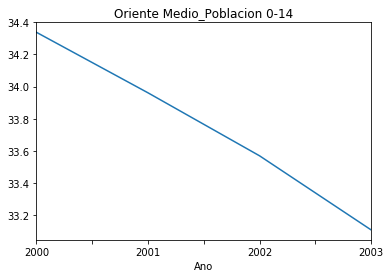

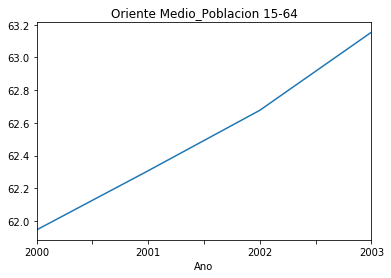

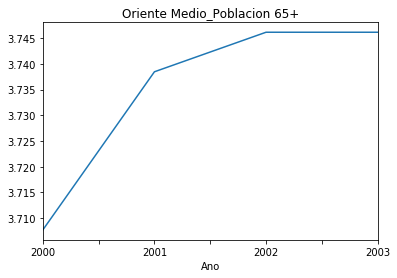

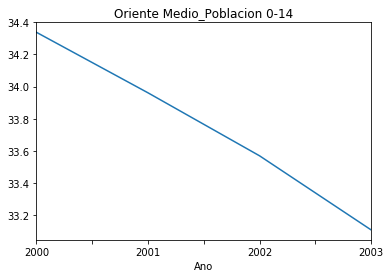

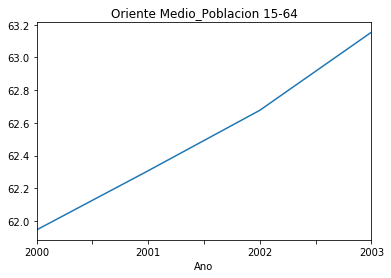

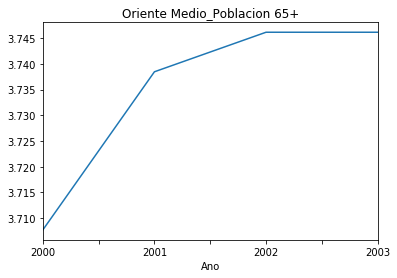

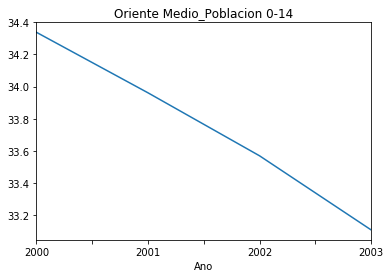

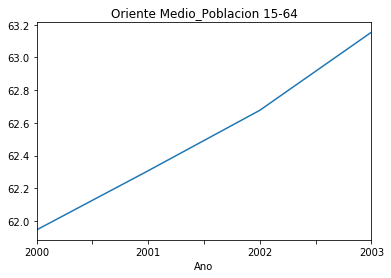

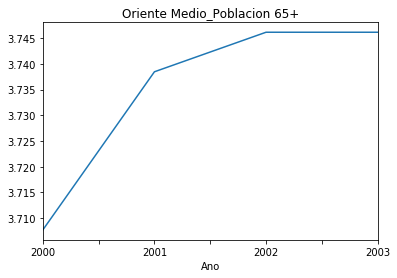

In [122]:
f = plt.figure()
counter = 0

for i in df.Region.unique():
    for j in df.Ano.unique():
        for k in ['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']:
            df5 = df.loc[(df.Region == i), ['Ano', k]]
            df5.Ano = df5.Ano.str[:4]
            df5 = df5.groupby('Ano')[k].mean()
            df5.plot(title = i+'_'+k)
            plt.show()

---